In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import colors
import matplotlib.patches as mpatches
import nibabel as nib

In [15]:
def my_dice(img1,img2):
 intersection = np.logical_and(img1, img2)
 union = np.logical_or(img1, img2)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice

def sensitivity (seg,ground): 
    #computs True Positive Rate (TPR)
    num=np.sum(np.multiply(ground, seg ))
    denom=np.sum(ground)
    if denom==0:
        return 1
    else:
        return  num/denom

def specificity1(seg,ground): 
    #computes True Negative Rate (TNR)
    num=np.sum(np.multiply(ground==0, seg ==0))
    denom=np.sum(ground==0)
    if denom==0:
        return 1
    else:
        return  num/denom
    
def specificity(pred_image, true_image):
    TN = len(np.where(pred_image + true_image == 0)[0])
    FP = len(np.where(pred_image - true_image == 1)[0])
    TNR = TN/(TN + FP)
    return TNR

In [168]:
def plot_slice(scan, mask_true, mask_pred, slice_nr):
    scan = np.rot90(scan)
    mask_true = np.rot90(mask_true)
    mask_pred = np.rot90(mask_pred)
    mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] <= 0.5, mask_pred[:,:,slice_nr])
    mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])
    cmap = colors.ListedColormap(["red"])
    cmap2 = colors.ListedColormap(["blue"])

    plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
    plt.axis("off")
    plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
    plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.5)
    dice_score = round(my_dice(mask_true[:,:,slice_nr], mask_pred[:,:,slice_nr]), 3)
    # = round(get_recall(mask_ture[slice_nr], mask_pred[slice_nr]), 3)
    #precision = round(get_precision(mask_ture[slice_nr],mask_pred[slice_nr]))
    print("Slice nr", slice_nr)
    title = str ("Dice score = "+ str(dice_score)) #+ "\n Precision = " + str(precision) + "\n Recall = " + str(recall))
    plt.title(title)
    red_patch = mpatches.Patch(color='red', label='Predicted mask')
    blue_patch = mpatches.Patch(color='blue', label='Actual mask')
    purple_patch = mpatches.Patch(color='purple', label='Overlap')
    plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "lower left")
    #plt.savefig("Brain MRI_T1 BC" + str(slice_nr))
    plt.show()

In [10]:
def plot_all(path_to_test_folder):
    all_files_list = []
    for path, dirs, files in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 2: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))

    image_count = 1
    for file in all_files_list:
        scan = np.rot90(nib.load(f'{path_to_test_folder}/{file}/T1.nii').get_fdata())
        mask_true = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_binarised.nii').get_fdata())
        mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/ples_lga_0.2_rmFLAIR.nii').get_fdata())

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i
            
        #slice_nr = scan.shape[2] // 2 + 15

        mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] == 0, mask_pred[:,:,slice_nr])
        mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])

        overlap = np.logical_and(mask_pred, mask_true)
        overlap_new = np.ma.masked_where(overlap[:,:,slice_nr] == 0, overlap[:,:,slice_nr])

        cmap = colors.ListedColormap(["crimson"])
        cmap2 = colors.ListedColormap(["blue"])
        cmap3 = colors.ListedColormap(["darkviolet"])

        plt.subplot(4, 4, image_count)
        image_count += 1
        plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
        plt.axis("off")
        plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
        plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.75)
        plt.imshow(overlap_new, cmap = cmap3, alpha = 0.80)
        dice_score = round(my_dice(mask_true, mask_pred), 4)
        sensitivity_score = round(sensitivity(mask_true, mask_pred), 4)
        specificity_score = round(specificity(mask_true, mask_pred), 5)
        print("Slice nr", slice_nr)
        title = str ("Dice score = "+ str(dice_score)+ "\n Sensitivty = " + str(sensitivity_score) + "\n Specificity = " + str(specificity_score))
        plt.title(title)
        red_patch = mpatches.Patch(color='red', label='Predicted mask')
        blue_patch = mpatches.Patch(color='yellow', label='Actual mask')
        purple_patch = mpatches.Patch(color='orange', label='Overlap')
        plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "lower left", prop={'size': 8})
        plt.gcf().set_size_inches(20, 20)

    plt.show()

204
192
Slice nr 100


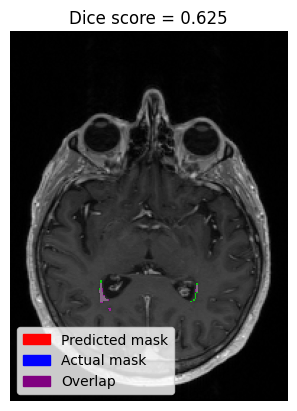

In [166]:
t1_scan = nib.load('/home/maarhus/Documents/Master/LST_data/LGA/MS_DATA_TEST/1003101869/T1.nii').get_fdata()
mask_true = nib.load('/home/maarhus/Documents/Master/LST_data/LGA/MS_DATA_TEST/1003101869/lesions_binarised.nii').get_fdata()
mask_pred = nib.load('/home/maarhus/Documents/Master/LST_data/LGA/MS_DATA_TEST/1003101869/ples_lga_0.2_rmFLAIR.nii').get_fdata()

print(t1_scan.shape[2])
print(len(t1_scan[:,:,100]>0))

plot_slice(t1_scan, mask_true, mask_pred, 100)

Slice nr 74
Slice nr 130
Slice nr 72
Slice nr 121
Slice nr 108
Slice nr 81
Slice nr 112
Slice nr 71


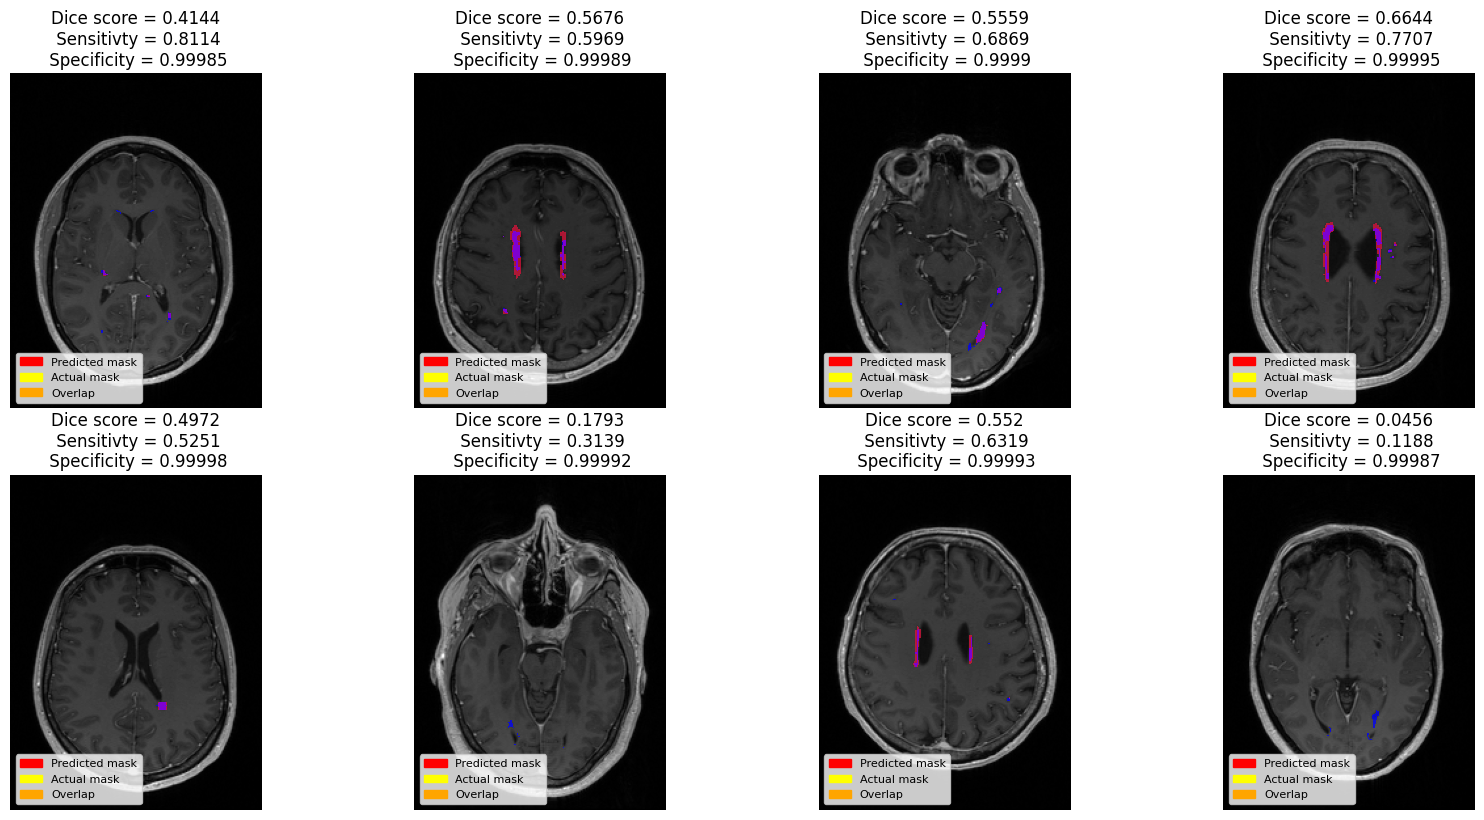

In [11]:
path_test_folder = '/home/maarhus/Documents/Master/LST_data/LGA/MS_DATA_TEST'
plot_all(path_test_folder)

In [59]:
def plot_all(path_to_test_folder):
    all_files_list = []
    for path, dirs, _ in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 2: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))

    image_count = 1
    for file in all_files_list:
        scan = np.rot90(nib.load(f'{path_to_test_folder}/{file}/T1.nii').get_fdata())
        mask_true = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_binarised.nii').get_fdata())
        mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lga(0.2)_thr_0.1_map.nii').get_fdata())
        

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i
            

        mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] == 0, mask_pred[:,:,slice_nr])
        mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])

        overlap = np.logical_and(mask_pred, mask_true)
        overlap_new = np.ma.masked_where(overlap[:,:,slice_nr] == 0, overlap[:,:,slice_nr])

        cmap = colors.ListedColormap(["crimson"])
        cmap2 = colors.ListedColormap(["cornflowerblue"])
        cmap3 = colors.ListedColormap(["darkviolet"])

        plt.subplot(4, 4, image_count)
        plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
        plt.axis("off")
        plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
        plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.75)
        plt.imshow(overlap_new, cmap = cmap3, alpha = 0.80)
        dice_score = round(my_dice(mask_true, mask_pred), 3)
        sensitivity_score = round(sensitivity(mask_pred, mask_true), 3)
        specificity_score = round(specificity(mask_pred, mask_true), 4)
        if specificity_score == 1.0:
            specificity_score = 0.9999
        print("Slice nr", slice_nr)
        title = str ("Dice score = "+ str(dice_score)+ "\n Sensitivty = " + str(sensitivity_score) + "\n Specificity = " + str(specificity_score))
        plt.title(title)
        red_patch = mpatches.Patch(color='crimson', label='Predicted mask')
        blue_patch = mpatches.Patch(color='cornflowerblue', label='Actual mask')
        purple_patch = mpatches.Patch(color='darkviolet', label='Overlap')
        plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "upper right", prop={'size': 7})
        plt.text(5,15, f'S{image_count}', size = 12, color='white')
        image_count += 1
        plt.gcf().set_size_inches(15, 20)

    #plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/LGA_seg_all_les.eps', format='eps', bbox_inches='tight')
    plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/LGA_seg_all_les.png', format='png', bbox_inches='tight', dpi =300)
    plt.show()

Slice nr 74
Slice nr 130
Slice nr 72
Slice nr 121
Slice nr 108
Slice nr 81
Slice nr 112
Slice nr 71


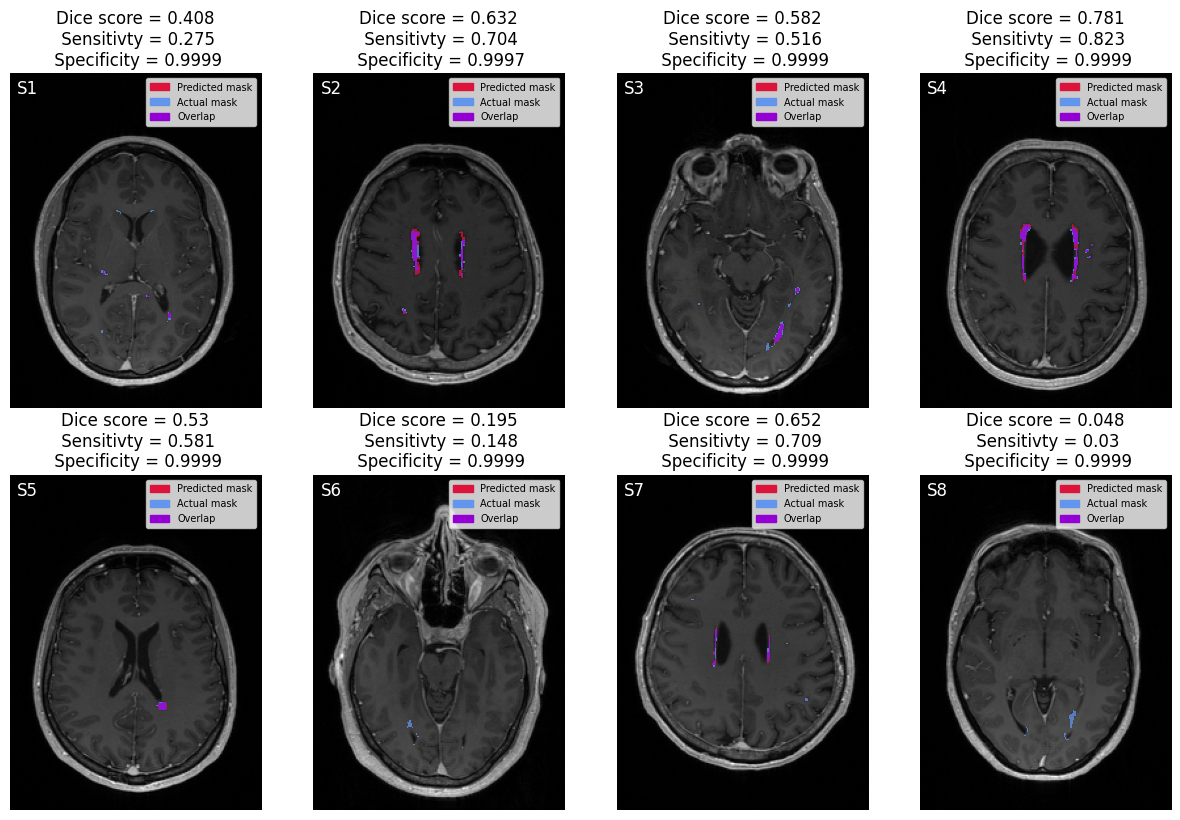

In [60]:
path_test_folder = '/home/maarhus/Documents/Master/Results/Predictions/LGA/MS_DATA_TEST'

plot_all(path_test_folder)


In [57]:
def plot_all_lpa(path_to_test_folder):
    all_files_list = []
    for path, dirs, files in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 1: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))

    image_count = 1
    for file in all_files_list:
        scan = np.rot90(nib.load(f'{path_to_test_folder}/{file}/T1.nii').get_fdata())
        mask_true = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_binarised.nii').get_fdata())
        mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lpa_thr_0.05_map.nii').get_fdata())

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i
            
        #slice_nr = scan.shape[2] // 2 + 15

        mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] == 0, mask_pred[:,:,slice_nr])
        mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])

        overlap = np.logical_and(mask_pred, mask_true)
        overlap_new = np.ma.masked_where(overlap[:,:,slice_nr] == 0, overlap[:,:,slice_nr])

        cmap = colors.ListedColormap(["crimson"])
        cmap2 = colors.ListedColormap(["cornflowerblue"])
        cmap3 = colors.ListedColormap(["darkviolet"])

        plt.subplot(4, 4, image_count)
        plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
        plt.axis("off")
        plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
        plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.75)
        plt.imshow(overlap_new, cmap = cmap3, alpha = 0.80)
        dice_score = round(my_dice(mask_true, mask_pred), 3)
        sensitivity_score = round(sensitivity(mask_pred, mask_true), 3)
        specificity_score = round(specificity(mask_pred, mask_true), 4)
        if specificity_score == 1.0:
            specificity_score = 0.9999
        print("Slice nr", slice_nr)
        title = str ("Dice score = "+ str(dice_score)+ "\n Sensitivty = " + str(sensitivity_score) + "\n Specificity = " + str(specificity_score))
        plt.title(title)
        red_patch = mpatches.Patch(color='crimson', label='Predicted mask')
        blue_patch = mpatches.Patch(color='cornflowerblue', label='Actual mask')
        purple_patch = mpatches.Patch(color='darkviolet', label='Overlap')
        plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "upper right", prop={'size': 7})
        plt.text(5,15, f'S{image_count}', size = 12, color='white')
        image_count += 1
        plt.gcf().set_size_inches(15, 20)

    #plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/LPA_seg_all_les.eps', format='eps', bbox_inches='tight')
    plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/LPA_seg_all_les.png', format='png', bbox_inches='tight', dpi =300)
    plt.show()

Slice nr 74
Slice nr 130
Slice nr 72
Slice nr 121
Slice nr 108
Slice nr 81
Slice nr 112
Slice nr 71


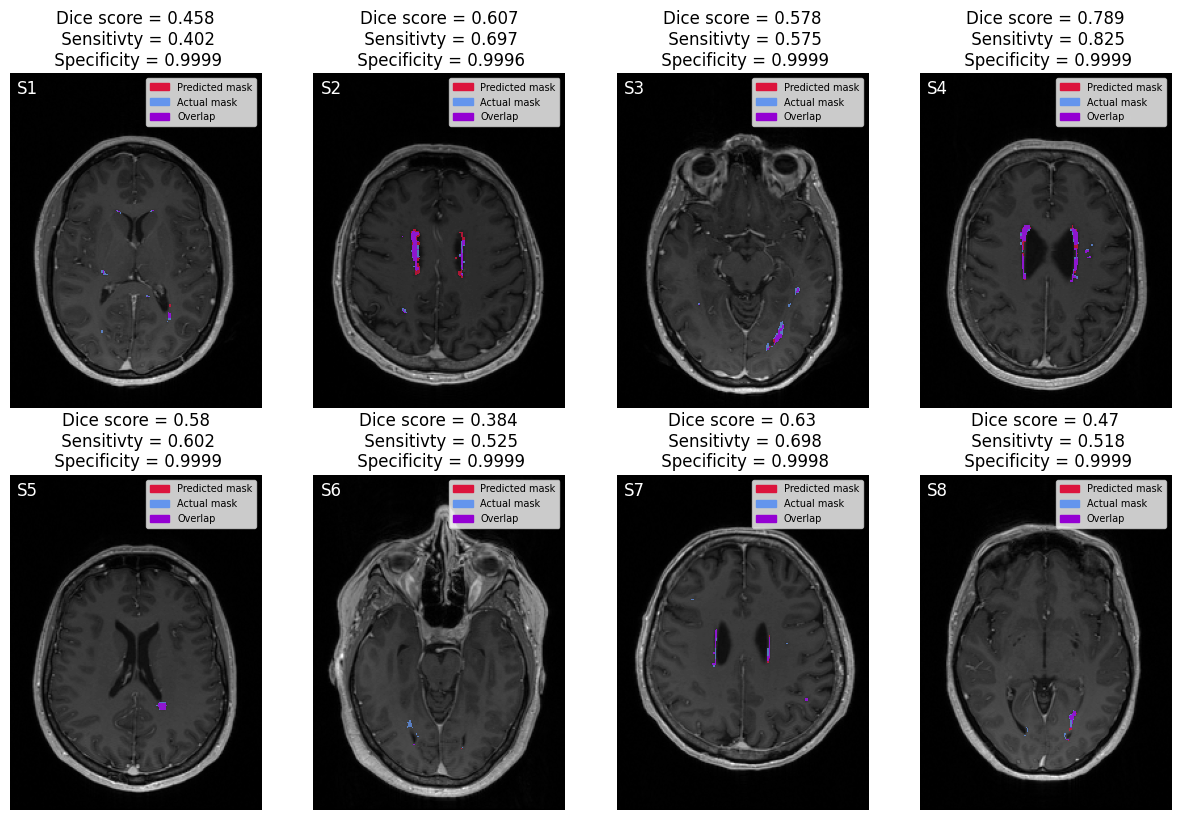

In [58]:
path_test_folder = '/home/maarhus/Documents/Master/Results/Predictions/LPA/MS_DATA_TEST'
plot_all_lpa(path_test_folder)

Slice nr 74
Slice nr 130
Slice nr 72
Slice nr 121
Slice nr 108
Slice nr 81
Slice nr 112
Slice nr 71


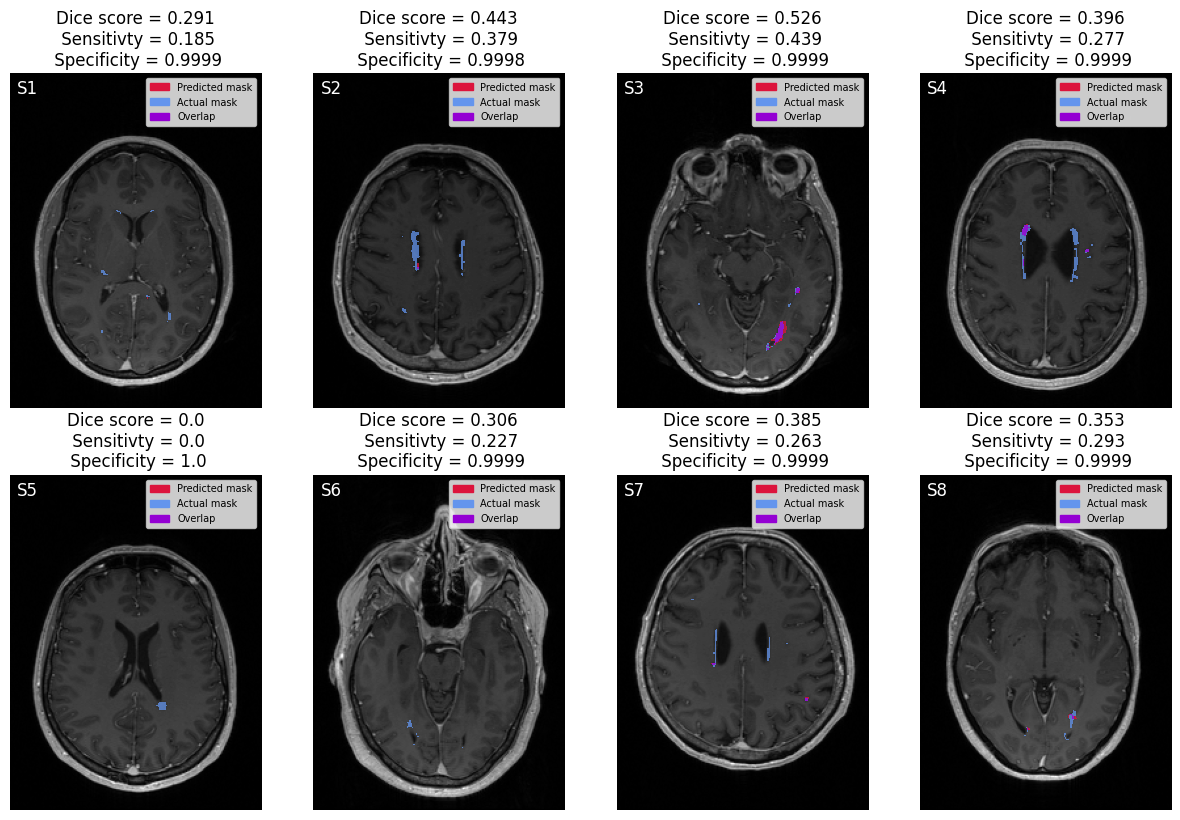

In [56]:
def plot_all_nicms(path_to_test_folder):
    all_files_list = []
    for path, dirs, files in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 3: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))

    image_count = 1
    for file in all_files_list:
        scan = np.rot90(nib.load(f'{path_to_test_folder}/{file}/T1.nii').get_fdata())
        mask_true = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_binarised.nii').get_fdata())
        mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/standard_model_maria/nicms_thr_0.7_map.nii').get_fdata())

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i
            
        #slice_nr = scan.shape[2] // 2 + 15

        mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] == 0, mask_pred[:,:,slice_nr])
        mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])

        overlap = np.logical_and(mask_pred, mask_true)
        overlap_new = np.ma.masked_where(overlap[:,:,slice_nr] == 0, overlap[:,:,slice_nr])

        cmap = colors.ListedColormap(["crimson"])
        cmap2 = colors.ListedColormap(["cornflowerblue"])
        cmap3 = colors.ListedColormap(["darkviolet"])

        plt.subplot(4, 4, image_count)
        plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
        plt.axis("off")
        plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
        plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.75)
        plt.imshow(overlap_new, cmap = cmap3, alpha = 0.80)
        dice_score = round(my_dice(mask_true, mask_pred), 3)
        sensitivity_score = round(sensitivity(mask_pred, mask_true), 3)
        specificity_score = round(specificity(mask_pred, mask_true), 4)
        if dice_score != 0.0 and specificity_score == 1.0:
            specificity_score = 0.9999
        print("Slice nr", slice_nr)
        title = str ("Dice score = "+ str(dice_score)+ "\n Sensitivty = " + str(sensitivity_score) + "\n Specificity = " + str(specificity_score))
        plt.title(title)
        red_patch = mpatches.Patch(color='crimson', label='Predicted mask')
        blue_patch = mpatches.Patch(color='cornflowerblue', label='Actual mask')
        purple_patch = mpatches.Patch(color='darkviolet', label='Overlap')
        plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "upper right", prop={'size': 7})
        plt.text(5,15, f'S{image_count}', size = 12, color='white')
        image_count += 1
        plt.gcf().set_size_inches(15, 20)

    #plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/nicMS_seg_all_les.eps', format='eps', bbox_inches='tight')
    plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/nicMS_seg_all_les.png', format='png', bbox_inches='tight', dpi =300)
    plt.show()

path_test_folder = '/home/maarhus/Documents/Master/Results/Predictions/nicMSlesions/nicMS_aug/MS_DATA_TEST'
plot_all_nicms(path_test_folder)

Slice nr 74
Slice nr 130
Slice nr 72
Slice nr 121
Slice nr 108
Slice nr 81
Slice nr 112
Slice nr 71


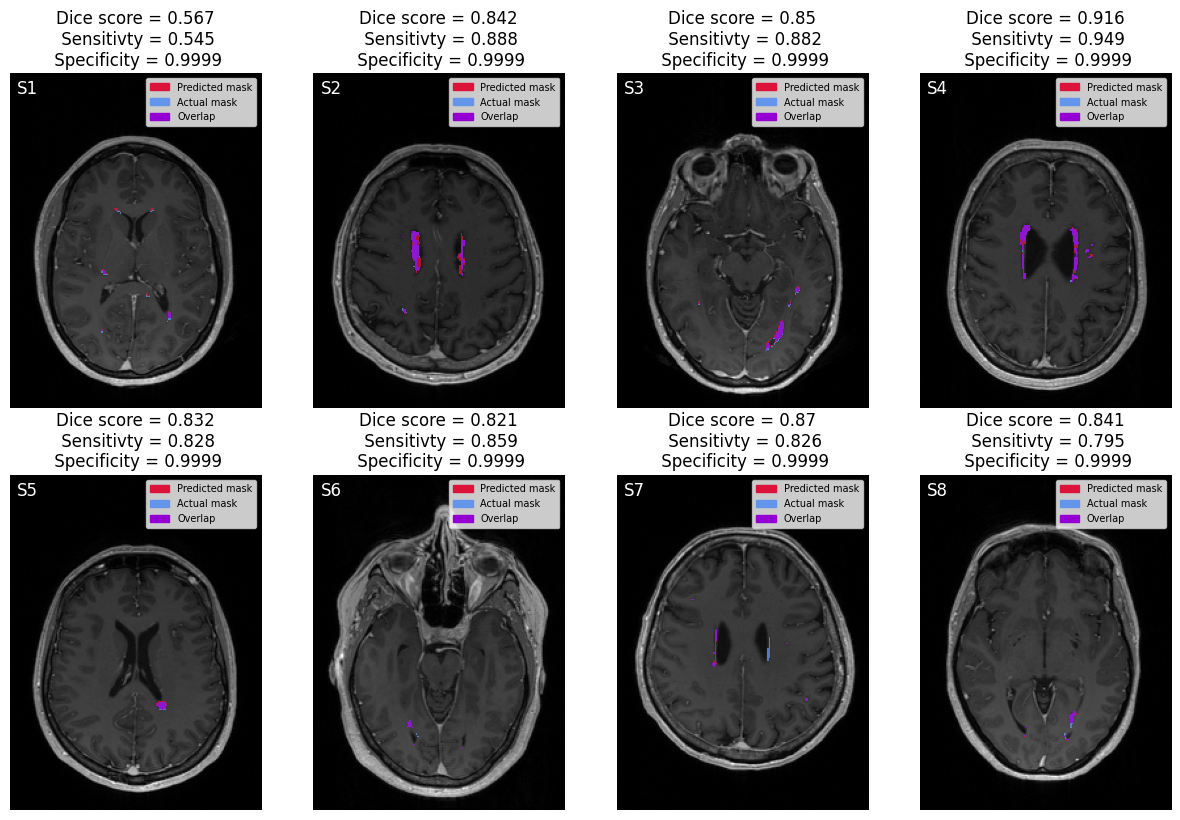

In [55]:
def plot_all_nnunet(path_to_test_folder):
    all_files_list = []
    for path, dirs, files in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 0: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))

    image_count = 1
    for file in all_files_list:
        scan = np.rot90(nib.load(f'/home/maarhus/Documents/Master/Results/Predictions/nicMSlesions/nicMS_aug/MS_DATA_TEST/{file}/T1.nii').get_fdata())
        mask_true_unrot = nib.load(f'/home/maarhus/Documents/Master/Results/Predictions/nicMSlesions/nicMS_aug/MS_DATA_TEST/{file}/lesions_binarised.nii').get_fdata()
        mask_true = np.rot90(mask_true_unrot)
        mask_pred_unrot = nib.load(f'{path_to_test_folder}/{file}/nnunet_thr_0.5_map_{file}.nii').get_fdata()
        mask_pred = np.rot90(mask_pred_unrot)

        if mask_pred.shape != mask_true.shape:
            diff_x = abs(mask_pred.shape[0]-mask_true.shape[0])
            diff_y = abs(mask_pred.shape[1]-mask_true.shape[1])
            diff_z = abs(mask_pred.shape[2]-mask_true.shape[2])
            if mask_true.shape < mask_pred.shape:
                mask_true = np.pad(mask_true, ((0, diff_x),(0, diff_y),(0, diff_z)), 'constant')

            if mask_true.shape > mask_pred.shape:
                mask_pred = np.pad(mask_pred, ((0, diff_x),(0, diff_y),(0, diff_z)), 'constant')

        if mask_pred_unrot.shape != mask_true_unrot.shape:
            diff_x = abs(mask_pred_unrot.shape[0]-mask_true_unrot.shape[0])
            diff_y = abs(mask_pred_unrot.shape[1]-mask_true_unrot.shape[1])
            diff_z = abs(mask_pred_unrot.shape[2]-mask_true_unrot.shape[2])
            if mask_true_unrot.shape < mask_pred_unrot.shape:
                mask_true_unrot = np.pad(mask_true_unrot, ((0, diff_x),(0, diff_y),(0, diff_z)), 'constant')

            if mask_true_unrot.shape > mask_pred_unrot.shape:
                mask_pred_unrot = np.pad(mask_pred_unrot, ((0, diff_x),(0, diff_y),(0, diff_z)), 'constant')

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i
            
        #slice_nr = scan.shape[2] // 2 + 15

        mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] == 0, mask_pred[:,:,slice_nr])
        mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])

        overlap = np.logical_and(mask_pred, mask_true)
        overlap_new = np.ma.masked_where(overlap[:,:,slice_nr] == 0, overlap[:,:,slice_nr])

        cmap = colors.ListedColormap(["crimson"])
        cmap2 = colors.ListedColormap(["cornflowerblue"])
        cmap3 = colors.ListedColormap(["darkviolet"])

        plt.subplot(4, 4, image_count)
        plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
        plt.axis("off")
        plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
        plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.75)
        plt.imshow(overlap_new, cmap = cmap3, alpha = 0.80)

        dice_score = round(my_dice(mask_pred_unrot, mask_true_unrot), 3)
        sensitivity_score = round(sensitivity(mask_pred_unrot, mask_true_unrot), 3)
        specificity_score = round(specificity(mask_pred_unrot, mask_true_unrot), 4)
        if specificity_score == 1.0:
            specificity_score = 0.9999
        
        print("Slice nr", slice_nr)
        title = str ("Dice score = "+ str(dice_score)+ "\n Sensitivty = " + str(sensitivity_score) + "\n Specificity = " + str(specificity_score))
        plt.title(title)
        red_patch = mpatches.Patch(color='crimson', label='Predicted mask')
        blue_patch = mpatches.Patch(color='cornflowerblue', label='Actual mask')
        purple_patch = mpatches.Patch(color='darkviolet', label='Overlap')
        plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "upper right", prop={'size': 7})
        plt.text(5,15, f'S{image_count}', size = 12, color='white')
        image_count += 1
        plt.gcf().set_size_inches(15, 20)

    #plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/nnUnet_seg_all_les.eps', format='eps', bbox_inches='tight')
    plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/nnUnet_seg_all_les.png', format='png', bbox_inches='tight', dpi =300)
    plt.show()

path_test_folder = '/home/maarhus/Documents/Master/Results/Predictions/nnUnet/pred_nnUnet/prob_map_folder'
plot_all_nnunet(path_test_folder)

Slice nr 74
Slice nr 130
Slice nr 72
Slice nr 121
Slice nr 108
Slice nr 81
Slice nr 112
Slice nr 71


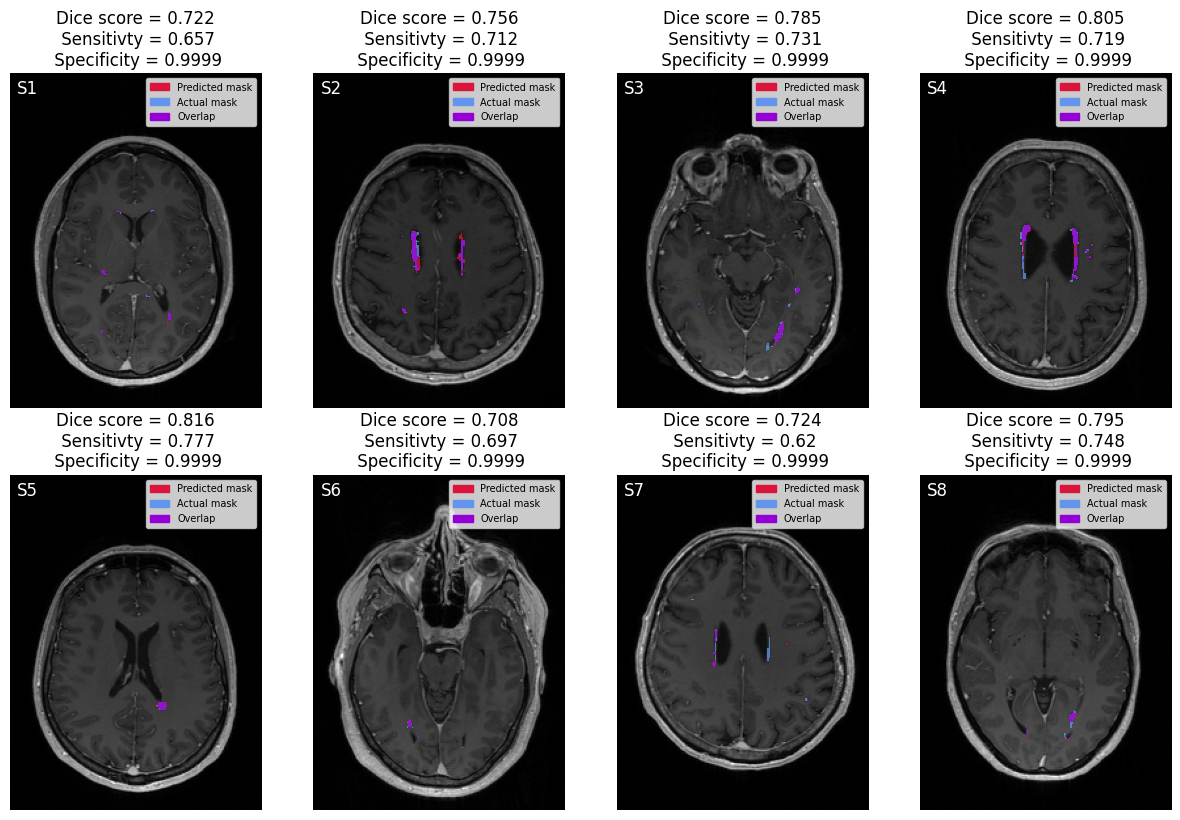

In [54]:
def plot_all_fm(path_to_test_folder):
    all_files_list = []
    for path, dirs, files in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 0: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))

    image_count = 1
    for file in all_files_list:
        scan = np.rot90(nib.load(f'{path_to_test_folder}/{file}/T1.nii').get_fdata())
        mask_true = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_binarised.nii').get_fdata())
        mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/pred_FLAIR.nii').get_fdata())

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i
            
        #slice_nr = scan.shape[2] // 2 + 15

        mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] == 0, mask_pred[:,:,slice_nr])
        mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])

        overlap = np.logical_and(mask_pred, mask_true)
        overlap_new = np.ma.masked_where(overlap[:,:,slice_nr] == 0, overlap[:,:,slice_nr])

        cmap = colors.ListedColormap(["crimson"])
        cmap2 = colors.ListedColormap(["cornflowerblue"])
        cmap3 = colors.ListedColormap(["darkviolet"])

        plt.subplot(4, 4, image_count)
        plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
        plt.axis("off")
        plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
        plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.75)
        plt.imshow(overlap_new, cmap = cmap3, alpha = 0.80)
        dice_score = round(my_dice(mask_true, mask_pred), 3)
        sensitivity_score = round(sensitivity(mask_pred, mask_true), 3)
        specificity_score = round(specificity(mask_pred, mask_true), 4)
        if specificity_score == 1.0:
            specificity_score = 0.9999
        print("Slice nr", slice_nr)
        title = str ("Dice score = "+ str(dice_score)+ "\n Sensitivty = " + str(sensitivity_score) + "\n Specificity = " + str(specificity_score))
        plt.title(title)
        red_patch = mpatches.Patch(color='crimson', label='Predicted mask')
        blue_patch = mpatches.Patch(color='cornflowerblue', label='Actual mask')
        purple_patch = mpatches.Patch(color='darkviolet', label='Overlap')
        plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "upper right", prop={'size': 7})
        plt.text(5,15, f'S{image_count}', size = 12, color='white')
        image_count += 1
        plt.gcf().set_size_inches(15, 20)

    #plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/fm_seg_all_les.eps', format='eps', bbox_inches='tight')
    plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/fm_seg_all_les.png', format='png', bbox_inches='tight', dpi =300)
    plt.show()

path_test_folder = '/home/maarhus/Documents/Master/Results/Predictions/fastMONAI/MS_DATA_TEST'
plot_all_fm(path_test_folder)

Slice nr 87
Slice nr 129
Slice nr 76
Slice nr 123
Slice nr 95
Slice nr 85
Slice nr 108
Slice nr 56


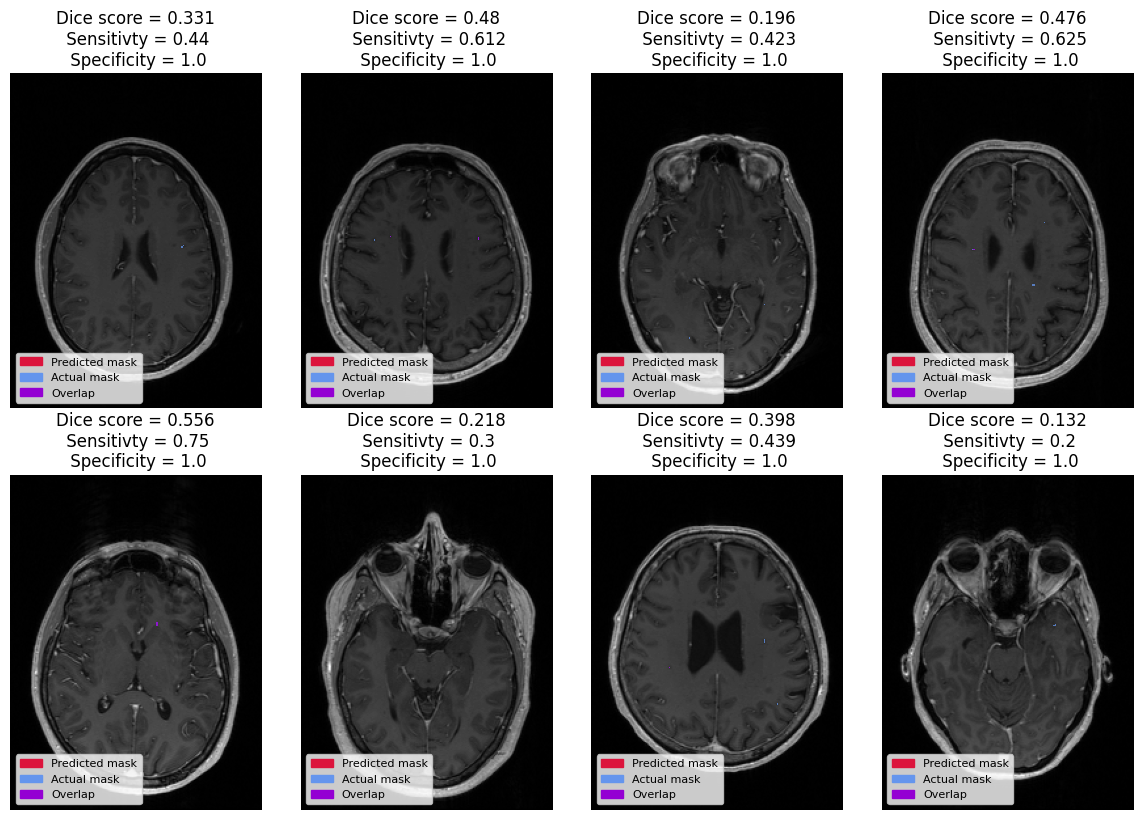

In [9]:
import matplotlib.gridspec as gridspec
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def plot_all_smallfm(path_to_test_folder):
    all_files_list = []
    for path, dirs, files in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 0: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))

    image_count = 1
    for file in all_files_list:
        scan = np.rot90(nib.load(f'/home/maarhus/Documents/Master/bwconncomp/true_test_labels/{file}/T1.nii').get_fdata())
        mask_true = np.rot90(nib.load(f'/home/maarhus/Documents/Master/bwconncomp/true_test_labels/{file}/lesions_removed_size20.nii').get_fdata())
        mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_removed_size20.nii').get_fdata())

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i
            
        #slice_nr = scan.shape[2] // 2 + 15
        mask_pred_new = np.ma.masked_where(mask_pred[:,:,slice_nr] == 0, mask_pred[:,:,slice_nr])
        mask_true_new = np.ma.masked_where(mask_true[:,:,slice_nr] == 0, mask_true[:,:,slice_nr])

        overlap = np.logical_and(mask_pred, mask_true)
        overlap_new = np.ma.masked_where(overlap[:,:,slice_nr] == 0, overlap[:,:,slice_nr])

        cmap = colors.ListedColormap(["crimson"])
        cmap2 = colors.ListedColormap(["cornflowerblue"])
        cmap3 = colors.ListedColormap(["darkviolet"])

        plt.subplot(4, 4, image_count)
        plt.subplots_adjust(wspace=0, hspace=0.2)
        image_count += 1
        plt.imshow(scan[:,:,slice_nr], cmap = "gray", alpha = 1.0)
        plt.axis("off")
        plt.imshow(mask_pred_new, cmap = cmap, alpha = 0.75)
        plt.imshow(mask_true_new, cmap = cmap2, alpha = 0.75)
        plt.imshow(overlap_new, cmap = cmap3, alpha = 0.80)


        dice_score = round(my_dice(mask_true, mask_pred), 3)
        sensitivity_score = round(sensitivity(mask_true, mask_pred), 3)
        specificity_score = round(specificity(mask_true, mask_pred), 4)
        print("Slice nr", slice_nr)
        title = str ("Dice score = "+ str(dice_score)+ "\n Sensitivty = " + str(sensitivity_score) + "\n Specificity = " + str(specificity_score))
        plt.title(title)
        red_patch = mpatches.Patch(color='crimson', label='Predicted mask')
        blue_patch = mpatches.Patch(color='cornflowerblue', label='Actual mask')
        purple_patch = mpatches.Patch(color='darkviolet', label='Overlap')
        plt.legend(handles = [red_patch, blue_patch, purple_patch], loc = "lower left", prop={'size': 8})
        plt.gcf().set_size_inches(15, 20)

    plt.savefig('/home/maarhus/Documents/Master/python_code/code/Figures/test_tusen.png', format='png', bbox_inches='tight', dpi =1000)
    plt.show()

path_test_folder = '/home/maarhus/Documents/Master/bwconncomp/fastMONAI/MS_DATA_TEST'
plot_all_smallfm(path_test_folder)

In [ ]:
import numpy as np
def image_viz_w_zoom(HCP, LS, vol_2D, vol_3D, slice, x, y, w, h): 
    imgs = [HCP, LS, vol_2D, vol_3D] 
    f, axs = plt.subplots(2, 4, figsize=(40,20))
    xmin, xmax, ymin, ymax = x - w//2, x + w//2, y - h//2, y + h//2
    samp_hcp = np.rot90(HCP)[ymin:ymax, xmin:xmax, slice]    
    for i in range(len(imgs)):
        image = np.rot90(imgs[i][:,:,slice])
        axs[0,i].plot([xmin, xmin], [ymin, ymax], color="red")
        axs[0,i].plot([xmax, xmax], [ymin, ymax], color="red")
        axs[0,i].plot([xmin, xmax], [ymin, ymin], color="red")
        axs[0,i].plot([xmin, xmax], [ymax, ymax], color="red")
        axs[0,i].imshow(image, cmap='gray')        
        axs[1,i].imshow(image[ymin:ymax, xmin:xmax], cmap='gray')
        #axs[2,i].imshow(image[ymin:ymax, xmin:xmax] - samp_hcp, vmin=-0.5, vmax=0.5)
        axs[0,i].axis('off')
        axs[1,i].axis('off')
        #axs[2,i].axis('off')    plt.axis('off')
    plt.show()

In [ ]:
def image_viz_w_zoom(path_test_folder, x, y, w, h): 

    all_files_list = []
    path_to_test_folder = '/home/maarhus/Documents/Master/bwconncomp/fastMONAI/MS_DATA_TEST'
    for path, dirs, files in os.walk(path_to_test_folder):
        #I know none of my subdirectories will have their own subfolders 
        if len(dirs) == 0: #Set to 2 because the lpa makes folder
            all_files_list.append(os.path.basename(path))
    all_files_list = all_files_list[0:4]

    f, axs = plt.subplots(2, 4, figsize=(40,20))
    xmin, xmax, ymin, ymax = x - w//2, x + w//2, y - h//2, y + h//2

    for file in all_files_list:
        scan = np.rot90(nib.load(f'/home/maarhus/Documents/Master/bwconncomp/true_test_labels/{file}/T1.nii').get_fdata())
        mask_true = np.rot90(nib.load(f'/home/maarhus/Documents/Master/bwconncomp/true_test_labels/{file}/lesions_removed_size20.nii').get_fdata())
        mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_removed_size20.nii').get_fdata())

        best_sum = 0
        for i in range(mask_true.shape[2]):
            binary_mask = mask_true[:,:,i]>0
            if binary_mask.sum() > best_sum:
                best_sum = binary_mask.sum()
                slice_nr = i

   
    #samp_hcp = np.rot90(HCP)[ymin:ymax, xmin:xmax, slice]    
    for i in range(4):
        #image = np.rot90(imgs[i][:,:,slice])
        axs[0,i].plot([xmin, xmin], [ymin, ymax], color="red")
        axs[0,i].plot([xmax, xmax], [ymin, ymax], color="red")
        axs[0,i].plot([xmin, xmax], [ymin, ymin], color="red")
        axs[0,i].plot([xmin, xmax], [ymax, ymax], color="red")
        axs[0,i].imshow(image, cmap='gray')        
        axs[1,i].imshow(image[ymin:ymax, xmin:xmax], cmap='gray')
        #axs[2,i].imshow(image[ymin:ymax, xmin:xmax] - samp_hcp, vmin=-0.5, vmax=0.5)
        axs[0,i].axis('off')
        axs[1,i].axis('off')
        #axs[2,i].axis('off')    plt.axis('off')
    plt.show()

In [14]:
all_files_list = []
path_to_test_folder = '/home/maarhus/Documents/Master/bwconncomp/fastMONAI/MS_DATA_TEST'
for path, dirs, files in os.walk(path_to_test_folder):
    #I know none of my subdirectories will have their own subfolders 
    if len(dirs) == 0: #Set to 2 because the lpa makes folder
        all_files_list.append(os.path.basename(path))

all_files_list = all_files_list[0:4]
print(all_files_list)

#scan = np.rot90(nib.load(f'/home/maarhus/Documents/Master/bwconncomp/true_test_labels/{file}/T1.nii').get_fdata())
#mask_true = np.rot90(nib.load(f'/home/maarhus/Documents/Master/bwconncomp/true_test_labels/{file}/lesions_removed_size20.nii').get_fdata())
#mask_pred = np.rot90(nib.load(f'{path_to_test_folder}/{file}/lesions_removed_size20.nii').get_fdata())

['2554238985', '1003101869', '6915167302', '1389542280']
